# Simple data

In [73]:
import bpy
bpy.app.version_string # current blender version

'4.4.3'

In [82]:
from pathlib import Path
from IPython.display import display, Image
from math import radians

def fresh_scene(keep_cube=False):
    # Deselect all objects
    bpy.ops.object.select_all(action='DESELECT')
    
    # Select all objects except cameras and optionally the default cube
    for obj in bpy.context.scene.objects:
        if obj.type == 'CAMERA':
            obj.select_set(False)
        elif obj.name == 'Cube' and keep_cube:
            obj.select_set(False)
        else:
            obj.select_set(True)
    
    # Delete selected objects
    bpy.ops.object.delete()
    
    # Add a light source
    bpy.ops.object.light_add(type='SUN')
    sun = bpy.context.active_object

    sun.location = (0, 0, 0)
    sun.rotation_euler = (radians(204), radians(-133), radians(-67))
    sun.data.energy = 3

def render_result():
    # Render the scene and save the result to the desktop
    path = Path.home() / 'Downloads'
    output_path = str(path / 'img.png')
    bpy.ops.render.render()
    bpy.data.images['Render Result'].save_render(filepath=output_path)
    
    # Display the saved image
    display(Image(filename=output_path))

# Set render resolution
bpy.context.scene.render.resolution_x = 500
bpy.context.scene.render.resolution_y = 200

# Install packages


In [83]:
#Option 1: On MacOS, if uv is installed via homebrew:
import subprocess
command = [
    "UV_PYTHON=python3.11",
    "/opt/homebrew/bin/uv", "pip", "install",
    "--prefix", "/Applications/Blender.app/Contents/Resources/4.3/python/",
    "matplotlib"
]
subprocess.run(" ".join(command), shell=True)

Using CPython 3.11.10
Audited 1 package in 6ms


CompletedProcess(args='UV_PYTHON=python3.11 /opt/homebrew/bin/uv pip install --prefix /Applications/Blender.app/Contents/Resources/4.3/python/ matplotlib', returncode=0)

In [84]:
# Option 2: use the Blender Python executable:
import subprocess
import sys
subprocess.check_call([sys.executable, "-m", "pip", "install", "polars"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib"])
subprocess.check_call([sys.executable, "-m", "pip", "install", "databpy"])


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /Applications/Blender.app/Contents/Resources/4.4/python/bin/python3.11 -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /Applications/Blender.app/Contents/Resources/4.4/python/bin/python3.11 -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: /Applications/Blender.app/Contents/Resources/4.4/python/bin/python3.11 -m pip install --upgrade pip


0

In [85]:
import polars as pl
url = 'https://raw.githubusercontent.com/kolibril13/ipydrop/refs/heads/main/dino.csv'
df1 = pl.read_csv(url)
length_data = len(df1)
print(f"Loaded {length_data} rows")
df1.head()

Loaded 142 rows


x,y
f64,f64
55.3846,97.1795
51.5385,96.0256
46.1538,94.4872
42.8205,91.4103
40.7692,88.3333


In [86]:
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

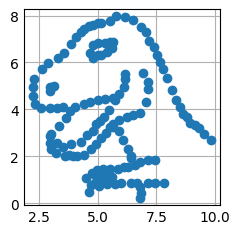

In [87]:
# Extract x and y from the DataFrame
x_values1 = df1['x'] / 10 
y_values1 = df1['y'] / 10 * 0.8

# Create the scatter plot using plt.scatter
plt.axis('equal');
plt.scatter(x_values1, y_values1);

In [88]:
def camera_from_above():
    camera = bpy.context.scene.camera
    camera.location = (6, 4, 10)  # Position above the XY plane
    camera.rotation_euler = (0, 0, 0)  # Rotate to look at XY plane
    # Set the camera to orthographic mode
    camera.data.type = 'ORTHO'
    # Set the orthographic scale to 12
    camera.data.ortho_scale = 9

    bpy.context.scene.render.resolution_x = 300
    bpy.context.scene.render.resolution_y = 300

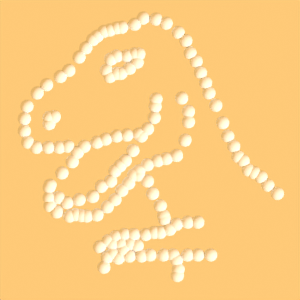

In [89]:
fresh_scene()

for (x, y) in zip(x_values1,y_values1):    
    bpy.ops.mesh.primitive_uv_sphere_add(radius=0.2, location=(x, y, 0))

camera_from_above()
render_result()

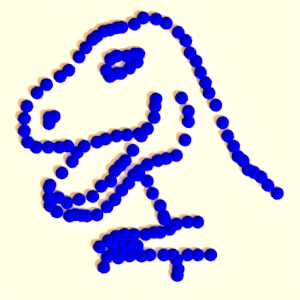

In [90]:
fresh_scene()

mat = bpy.data.materials.new(name="GreenMaterial")
mat.diffuse_color = (0, 0, 1, 1)  # Green color (R, G, B, A)

for (x, y) in zip(x_values1,y_values1):    
    bpy.ops.mesh.primitive_uv_sphere_add(radius=0.2, location=(x, y, 0))
    bpy.context.active_object.data.materials.append(mat)

bpy.context.scene.render.resolution_x = 300
bpy.context.scene.render.resolution_y = 300

# Add a white plane behind the spheres
bpy.ops.mesh.primitive_plane_add(size=20, location=(5, 5, 0))  
plane = bpy.context.active_object

# Create a white material and assign it to the plane
white_mat = bpy.data.materials.new(name="WhiteMaterial")
white_mat.diffuse_color = (1, 1, 1, 1)  # White color (R, G, B, A)
plane.data.materials.append(white_mat)

render_result()

this works, but it's very limited!
E.g. 
* not possible to scale individual spheres.
* not possible to use geometry nodes with this object.



Can we maybe add this geometry nodes setup?

# Loading Pre-Defined Geometry Nodes
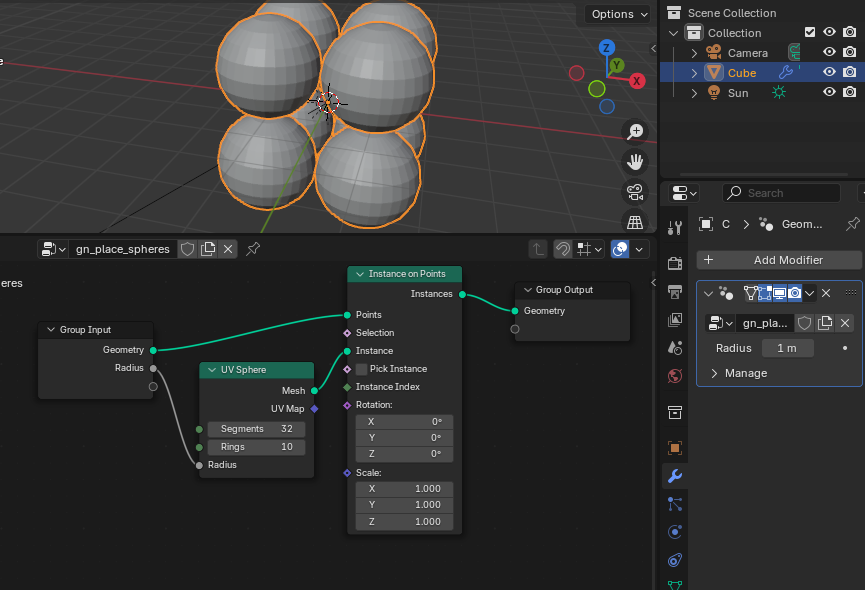

In [93]:
# option 1: Load the node group to the current blend scene
import bpy
from pathlib import Path

fresh_scene()

# Use the project path for both files
docs_folder = Path.home() / "projects/bpy-gallery/docs"

# Load all objects from the first .blend file (donut.blend)
blend_file1 = docs_folder / "donut.blend"
filepath1 = str(blend_file1)

with bpy.data.libraries.load(filepath1, link=False) as (data_from, data_to):
    data_to.objects = data_from.objects

for obj in data_to.objects:
    if obj is not None:
        bpy.context.collection.objects.link(obj)

# Load only the node group from the second .blend file (cube_gn_position.blend)
blend_file2 = docs_folder / "cube_gn_position.blend"
filepath2 = str(blend_file2)
node_group_name2 = "gn_place_spheres"

with bpy.data.libraries.load(filepath2, link=False) as (data_from, data_to):
    if node_group_name2 in data_from.node_groups:
        data_to.node_groups = [node_group_name2]

# Access the node group
node_group_place_spheres = bpy.data.node_groups[node_group_name2]

# Print all the node names inside the node group
print(f"Nodes in node group '{node_group_name2}':")
for node in node_group_place_spheres.nodes:
    print(node.name)

Nodes in node group 'gn_place_spheres':
Group Input
Group Output
Instance on Points
UV Sphere


SinglePoint


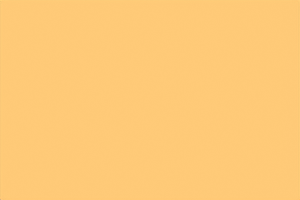

In [94]:
fresh_scene()
import mathutils
import databpy as db

# Old way
# Create a new mesh and object for the point cloud
#mesh = bpy.data.meshes.new("HelloMesh")
#my_point_obj = bpy.data.objects.new("HelloPoint", mesh)
#points = [mathutils.Vector((6, 4, 0))]  # One point at coordinates
# Apply the points to the mesh
#mesh.from_pydata(vertices = points, edges=[], faces=[])
#mesh.update()
#bpy.context.collection.objects.link(my_point_obj)

#new way:

import numpy as np
import databpy as db

single_vertex = np.array([[6, 4, 0]])

# Create a mesh object with the single vertex
my_point_obj = db.create_object(single_vertex, name="SinglePoint")

# Print the name of the created object
print(my_point_obj.name)

bpy.context.scene.render.resolution_x = 300
bpy.context.scene.render.resolution_y = 200
render_result()

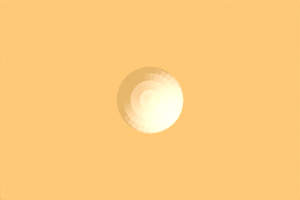

In [95]:
modifier = my_point_obj.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = node_group_place_spheres
render_result()

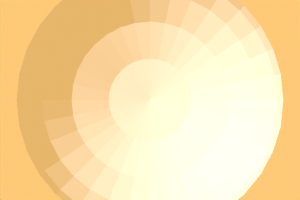

In [96]:
my_point_obj.modifiers["GeometryNodes"]["Socket_2"] = 4 # set radius
render_result()

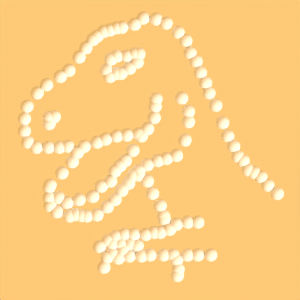

In [97]:
fresh_scene()

single_vertex = np.array([(x, y, 0) for x, y in zip(x_values1, y_values1)])

my_point_obj = db.create_object(single_vertex, name="Deno")

mesh = bpy.data.meshes.new("HelloDenoMesh")
my_point_obj = bpy.data.objects.new("HelloDeno", mesh)

points = [mathutils.Vector((x, y, 0)) for x, y in zip(x_values1, y_values1)] 

# Apply the points to the mesh
mesh.from_pydata(vertices=points, edges=[], faces=[])
mesh.update()
bpy.context.collection.objects.link(my_point_obj)


modifier = my_point_obj.modifiers.new(name="GeometryNodes", type='NODES')
modifier.node_group = node_group_place_spheres

my_point_obj.modifiers["GeometryNodes"]["Socket_2"] = 0.2  # Set radius

camera_from_above()
render_result()

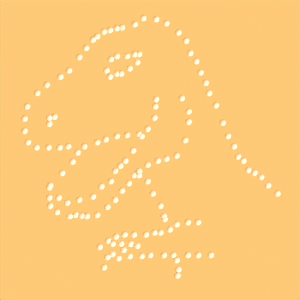

In [98]:
my_point_obj.modifiers["GeometryNodes"]["Socket_2"] = 0.1  # Set radius

render_result()

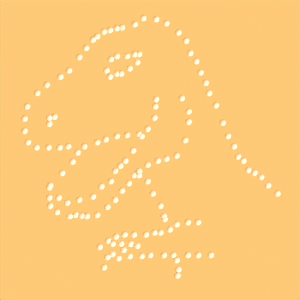

In [99]:
# 💡 Now we can squeeze or change anything in geonodes!
render_result()

In [101]:
# Also possible to change the data points
import polars as pl
url = 'https://raw.githubusercontent.com/kolibril13/ipydrop/refs/heads/main/star.csv'
df = pl.read_csv(url)
df.head()

x,y
f64,f64
58.213608,91.881892
58.196054,92.214989
58.718231,90.310532
57.278373,89.907607
58.08202,92.008145


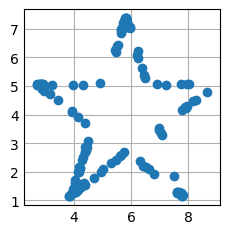

In [102]:
x_values = df['x'] / 10 
y_values = df['y'] / 10 * 0.8

plt.axis('equal');
plt.scatter(x_values, y_values);

In [103]:
# Only update the vertex positions without clearing the geometry
for i, (x, y) in enumerate(zip(x_values, y_values)):
    my_point_obj.data.vertices[i].co = (x, y, 0)

# Update the mesh and force Blender to recalculate
my_point_obj.data.update()
bpy.context.view_layer.update()

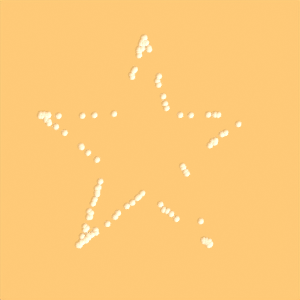

In [104]:
render_result()